# Can you predict the strength of concrete?

## 📖 Background
You work in the civil engineering department of a major university. You are part of a project testing the strength of concrete samples. 

Concrete is the most widely used building material in the world. It is a mix of cement and water with gravel and sand. It can also include other materials like fly ash, blast furnace slag, and additives. 

The compressive strength of concrete is a function of components and age, so your team is testing different combinations of ingredients at different time intervals. 

The project leader asked you to find a simple way to estimate strength so that students can predict how a particular sample is expected to perform.

In [1]:
install.packages("caret")
install.packages("ranger")

Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/caret_6.0-93.tar.gz' ...
	OK [downloaded 3.4 Mb in 0.2 secs]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/ModelMetrics_1.2.2.2.tar.gz' ...
	OK [downloaded 1.1 Mb in 0.2 secs]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/pROC_1.18.0.tar.gz' ...
	OK [downloaded 1.4 Mb in 0.2 secs]
Installing ModelMetrics [1.2.2.2] ...
	OK [installed binary]
Moving ModelMetrics [1.2.2.2] into the cache ...
	OK [moved to cache in 0.4 milliseconds]
Installing pROC [1.18.0] ...
	OK [installed binary]
Moving pROC [1.18.0] into the cache ...
	OK [moved to cache in 0.33 milliseconds]
Installing caret [6.0-93] ...
	OK [installed binary]
Moving caret [6.0-93] into the cache ...
	OK [moved to cache in 0.33 milliseconds]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/ranger_0.14.1.tar.gz' ...
	OK [downloaded 4.3

In [2]:
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(broom))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(caret))

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


In [3]:
concrete <- read_csv('data/concrete_data.csv', show_col_types = FALSE)
head(concrete)

cement,slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
540.0,0.0,0,162,2.5,1040.0,676.0,28,79.98611
540.0,0.0,0,162,2.5,1055.0,676.0,28,61.88737
332.5,142.5,0,228,0.0,932.0,594.0,270,40.26954
332.5,142.5,0,228,0.0,932.0,594.0,365,41.05278
198.6,132.4,0,192,0.0,978.4,825.5,360,44.29608
266.0,114.0,0,228,0.0,932.0,670.0,90,47.02985


## 1. The average strength of the concrete samples at 1, 7, 14, and 28 days of age

In [4]:
concrete %>%
	group_by(age) %>%
	summarize(
		mean_strength = mean(strength)    
    ) %>%
	filter(
        age == 1 |
        age == 7 |
        age == 14 |
        age == 28 
    )

age,mean_strength
<dbl>,<dbl>
1,9.452716
7,26.050623
14,28.751038
28,36.748480


* age 1 = 9.45
* age 7 = 26.05
* age 14 = 28.75
* age 28 = 36.75

## 2. The coefficients $\beta_{0}$, $\beta_{1}$ ... $\beta_{8}$, to use in the following formula: 

$$ Concrete \ Strength = \beta_{0} \ + \ \beta_{1}*cement \ + \ \beta_{2}*slag \ + \ \beta_{3}*fly \ ash  \ + \ \beta_{4}*water \ + $$ 
$$ \beta_{5}*superplasticizer \ + \ \beta_{6}*coarse \ aggregate \ + \ \beta_{7}*fine \ aggregate \ + \ \beta_{8}*age $$

In [5]:
lm(strength ~., data = concrete)


Call:
lm(formula = strength ~ ., data = concrete)

Coefficients:
     (Intercept)            cement              slag           fly_ash  
       -23.16376           0.11979           0.10385           0.08794  
           water  superplasticizer  coarse_aggregate    fine_aggregate  
        -0.15030           0.29069           0.01803           0.02015  
             age  
         0.11423  


$$ Concrete \ Strength = -23.16 + \ (0.12*cement) \ + \ (0.10*slag) \ + \ (0.09*fly \ ash)  \ - \ (0.15*water) \ + $$ 
$$ (0.29*superplasticizer) \ + \ (0.02*coarse \ aggregate) \ + \ (0.02*fine \ aggregate) \ + \ (0.11*age) $$

## 3. Predicting the strength of concrete

In [6]:
set.seed(100)

### Model 1

In [7]:
model1 <- lm(strength ~., concrete)
concrete$predicted1 <- predict(
	model1,
    concrete,
    type = "response"
)

diff1 <- concrete$predicted1 - concrete$strength
model1_RMSE <- sqrt(mean(diff1)^2)

### Model 2

In [8]:
model2 <- train(
	strength ~.,
    concrete,
    method = "ranger",
    tuneLength = 100
)
concrete$predicted2 <- predict(
	model2,
    concrete
)
diff2 <- concrete$predicted2 - concrete$strength
model2_RMSE <- sqrt(mean(diff2)^2)

note: only 8 unique complexity parameters in default grid. Truncating the grid to 8 .



### Model 3

In [9]:
model3 <- train(
	strength ~.,
    concrete,
    method = "lm"
)

concrete$predicted3 <- predict(
    model3,
    concrete
)

diff3 <- concrete$predicted3 - concrete$strength
model3_RMSE <- sqrt(mean(diff3)^2)

Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(modelFi

### Model 4

In [10]:
model4 <- train(
    strength ~.,
    concrete,
    method = "lm",
    trControl = trainControl(
        method = "cv",
        number = 10,
        verboseIter = TRUE
    )
)

concrete$predicted4 <- predict(
    model4,
    concrete
)
diff4 <- concrete$predicted4 - concrete$strength
model4_RMSE <- sqrt(mean(diff4)^2)

+ Fold01: intercept=TRUE 


Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”


- Fold01: intercept=TRUE 
+ Fold02: intercept=TRUE 


Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”


- Fold02: intercept=TRUE 
+ Fold03: intercept=TRUE 


Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”


- Fold03: intercept=TRUE 
+ Fold04: intercept=TRUE 


Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”


- Fold04: intercept=TRUE 
+ Fold05: intercept=TRUE 


Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”


- Fold05: intercept=TRUE 
+ Fold06: intercept=TRUE 


Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”


- Fold06: intercept=TRUE 
+ Fold07: intercept=TRUE 


Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”


- Fold07: intercept=TRUE 
+ Fold08: intercept=TRUE 


Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”


- Fold08: intercept=TRUE 
+ Fold09: intercept=TRUE 


Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”


- Fold09: intercept=TRUE 
+ Fold10: intercept=TRUE 


Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”


- Fold10: intercept=TRUE 
Aggregating results
Fitting final model on full training set


Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”


### Comparing models


In [22]:
RMSE_df <- as.data.frame(c(model1_RMSE, model2_RMSE, model3_RMSE, model4_RMSE), row.names = c("1", "2", "3", "4"))

(RMSE_df <- RMSE_df %>%
	rename("RMSE" = "c(model1_RMSE, model2_RMSE, model3_RMSE, model4_RMSE)") %>%
	mutate("Model" = c(1,2,3,4)))

,RMSE,Model
,<dbl>,<dbl>
1,1.267719e-13,1
2,6.801873e-03,2
3,1.070839e-13,3
4,1.070839e-13,4


In [26]:
filtered_RMSE <- RMSE_df %>%
	filter(Model == 1 | Model == 3 | Model == 4)

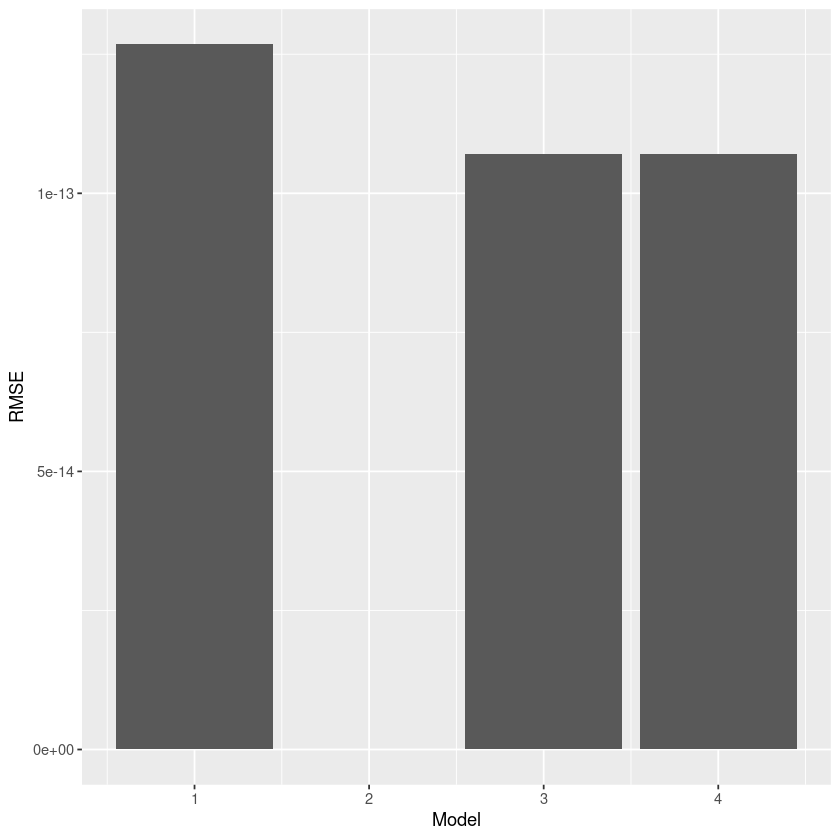

In [27]:
ggplot(filtered_RMSE, aes(Model, RMSE)) +
	geom_bar(stat = "identity")

Model 3 and 4 are the best models to predict concrete based off of RMSE alone.